In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('campus_data.csv')

In [3]:
dataset.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


## Feature Encoding


#### catgorising columns for further labelling

In [4]:

dataset["gender"] = dataset["gender"].astype('category')
dataset["ssc_b"] = dataset["ssc_b"].astype('category')
dataset["hsc_b"] = dataset["hsc_b"].astype('category')
dataset["degree_t"] = dataset["degree_t"].astype('category')
dataset["workex"] = dataset["workex"].astype('category')
dataset["specialisation"] = dataset["specialisation"].astype('category')
dataset["status"] = dataset["status"].astype('category')
dataset["hsc_s"] = dataset["hsc_s"].astype('category')
dataset.dtypes

gender            category
ssc_p              float64
ssc_b             category
hsc_p              float64
hsc_b             category
hsc_s             category
degree_p           float64
degree_t          category
workex            category
etest_p            float64
specialisation    category
mba_p              float64
status            category
dtype: object

In [5]:
dataset["gender"] = dataset["gender"].cat.codes
dataset["ssc_b"] = dataset["ssc_b"].cat.codes
dataset["hsc_b"] = dataset["hsc_b"].cat.codes
dataset["degree_t"] = dataset["degree_t"].cat.codes
dataset["workex"] = dataset["workex"].cat.codes
dataset["specialisation"] = dataset["specialisation"].cat.codes
dataset["status"] = dataset["status"].cat.codes
dataset["hsc_s"] = dataset["hsc_s"].cat.codes
 

dataset.head()


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


### Checking how each column is corelated with target variable

In [85]:
cor=dataset.corr()['status'].sort_values()
cor

specialisation   -0.250655
degree_t         -0.020352
hsc_b             0.016945
hsc_s             0.033442
ssc_b             0.037297
mba_p             0.076922
gender            0.090670
etest_p           0.127639
workex            0.276060
degree_p          0.479861
hsc_p             0.491228
ssc_p             0.607889
status            1.000000
Name: status, dtype: float64

## Logistice Regression

In [86]:
# selecting the features and labels
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
 
# display dependent variables
Y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int8)

### Dividing the data into train and test

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.25,random_state=65)
 
dataset.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


### Creating a classifier using sklearn

In [162]:
from sklearn.linear_model import LogisticRegression
 
clf = LogisticRegression().fit(X_train,Y_train)


clf.score(X_test, Y_test)

0.8703703703703703

### Creating a Y_pred for test data

In [163]:
Y_pred = clf.predict(X_test)
 

Y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int8)

In [164]:
from sklearn.metrics import confusion_matrix, accuracy_score
 

print(confusion_matrix(Y_test, Y_pred))
 

print(accuracy_score(Y_test, Y_pred))

[[15  3]
 [ 4 32]]
0.8703703703703703


## 1) Binary Classification Problem

### 1.1)Decision Tree Based Models


Using Decision Tree based Algorithm does not require feature scaling, and works great also in presence of categorical columns without ONE_HOT Encoding

In [153]:
X1 = dataset[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]

Y1 = dataset['status']

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1,test_size=0.25,random_state=65)
 

dataset.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dec_tree = DecisionTreeClassifier(criterion='entropy')
dec_tree.fit(X_train, Y_train)
y_pred = dec_tree.predict(X_test)

In [156]:
print(confusion_matrix(Y_test, y_pred))

[[ 9  9]
 [ 3 33]]


In [157]:
accuracy_score(Y_test, y_pred)

0.7777777777777778

In [158]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        18
           1       0.79      0.92      0.85        36

    accuracy                           0.78        54
   macro avg       0.77      0.71      0.72        54
weighted avg       0.77      0.78      0.76        54



### 1.2 Random forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
y1_pred = random_forest.predict(X_test)

In [160]:
print(confusion_matrix(Y_test, y1_pred))

[[13  5]
 [ 1 35]]


In [161]:
accuracy_score(Y_test, y1_pred)

0.8888888888888888

In [111]:
print(classification_report(Y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        18
           1       0.88      0.97      0.92        36

    accuracy                           0.89        54
   macro avg       0.90      0.85      0.87        54
weighted avg       0.89      0.89      0.88        54



### Feature importance

In [112]:
rows = list(X1.columns)
imp = pd.DataFrame(np.zeros(6*len(rows)).reshape(2*len(rows), 3))
imp.columns = ["Classifier", "Feature", "Importance"]

#Add Rows

for index in range(0, 2*len(rows), 2):
    imp.iloc[index] = ["DecisionTree", rows[index//2], (100*dec_tree.feature_importances_[index//2])]
    imp.iloc[index +1] = ["RandomForest", rows[index//2], (100*random_forest.feature_importances_[index//2])]

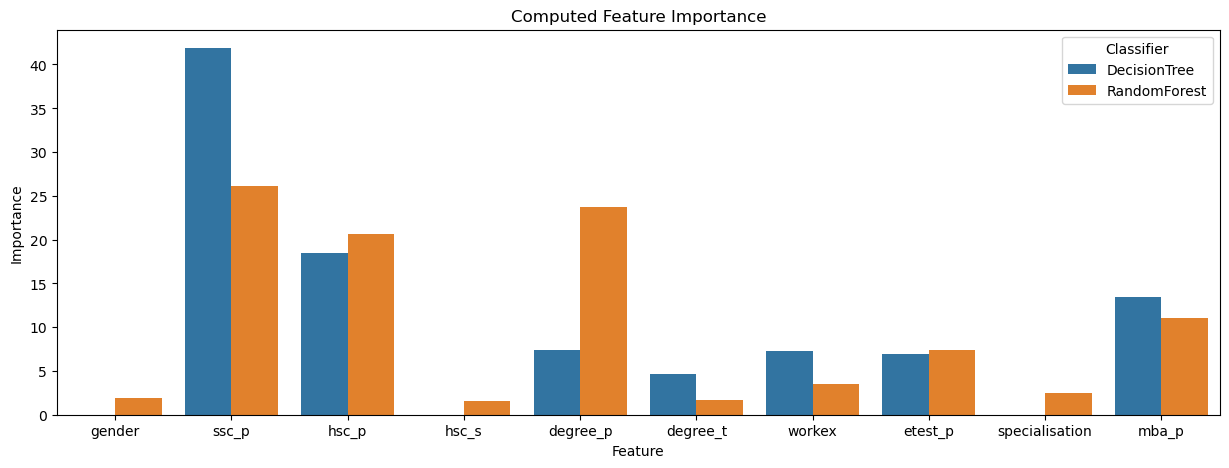

In [113]:
plt.figure(figsize=(15,5))
sns.barplot("Feature", "Importance", hue="Classifier", data=imp)
plt.title("Computed Feature Importance")
plt.show()

#### Insights

- Least affecting features are hsc_s.
- The features that affect the most are ssc_P, hsc_p degree_p.
- And other features also affect placement status but not that much.

- Top Five feaatures that affect placement status
- ssc_p
- hsc_p
- degree_p
- mba_p
- etest_p


## Binary Classification with Logistic regression 

- One hot encoding

In [114]:
X2 = dataset[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y2 = dataset['status']

### Reverse Mapping and making Categorical

In [68]:
X2["gender"] = pd.Categorical(X2.gender.map({1:"M",0:"F"}))
X2["hsc_s"] = pd.Categorical(X2.hsc_s.map({0:"Commerce",1:"Science",2:"Arts"}))
X2["degree_t"] = pd.Categorical(X2.degree_t.map({0:"Comm&Mgmt",1:"Sci&Tech",2:"Others"}))
X2["workex"] = pd.Categorical(X2.workex.map({0:"No",1:"Yes"}))
X2["specialisation"] = pd.Categorical(X2.specialisation.map({0:"Mkt&HR",1:"Mkt&Fin"}))

In [115]:
#One-Hot Encoding
X = pd.get_dummies(X2)
colmunn_names = X.columns.to_list()

### MinMaxScaler 

In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, test_size=0.2,random_state=65)

### Logistics model after reverse mapping and scalling

In [118]:
from sklearn.linear_model import LogisticRegression

In [129]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

In [130]:
accuracy_score(y_test, y_pred)

0.8604651162790697

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.87      0.93      0.90        28

    accuracy                           0.86        43
   macro avg       0.86      0.83      0.84        43
weighted avg       0.86      0.86      0.86        43



###  Conclusion

#### - Accuracy score of logistics regression before scalling is 87.03%
#### - Accuracy score of Decission tree is 77.77%
#### - Accuracy score of Random Forest is 88.88%
#### - Accuracy score of logistice regression after doing reverse mapping and scalling is 86.04%